### Installing required libraries and warnings

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Increasing the display count of rows and columns for better analysis

In [2]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

# Data Sourcing.

### Reading files

In [3]:
app_data= pd.read_csv("Application_Data.csv")

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Checking the rows and columns in the form of shape

In [5]:
app_data.shape

(307511, 122)

### Checking the variable types as in info. if it requires any conversion

In [6]:
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### Total count of NA values

In [7]:
app_data.isna().sum().sum()

9152465

### Check missing values in percentage

In [8]:
((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Filtering data

In [9]:
#drop columns with more than 45% null values
app_data = app_data.loc[:, app_data.isnull().mean() < .45]

### Checking the nature of columns if it requires conversion

In [10]:
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']]

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,1.0,0.0,0.0,1.0,0.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#As we can see these are not actually float type and has missing values so we need to convert them to integer
#But first we need to fill the missing values
#Next we need to check outliers and mean

In [12]:
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT']].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,1.899974,0.267395,0.034362,0.007000,0.006402,0.265474
std,1.869295,0.916002,0.204685,0.110757,0.083849,0.794056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,27.000000,8.000000,9.000000,4.000000,261.000000


### Imputing values.

In [13]:
#Replacing the missing values by their respectve mode values

In [14]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(1, inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace = True)
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace = True)

### Next step we followed was to load the columns description file in the DataFrame running through a code

In [15]:
cols_des=pd.read_csv('Columns_Description.csv',encoding = 'ISO-8859-1',low_memory=False)
cols_des

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


#### So taking the input of the descriptores from the columns_description data source we inferred that some columns are not irrelevant to the business problem of the case study and hence we decided these columns to drop

In [16]:
app_data.drop(['CNT_CHILDREN','NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
], axis = 1,inplace=True) 

### Post dropping the unwanted columns we looked at revised rows and columns in the form of shape

In [17]:
app_data.shape

(307511, 39)

#### In the above we can see that the column size is significantly reduced

### Checking the percentage of remaining missing values in each column

In [18]:
((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
AMT_CREDIT                      0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
TARGET                          0.000000
AMT_INCOME_TOTAL                0.000000
FLAG_OWN_REALTY                 0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_HOUSING_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
DAYS_BIRTH      

#### Now, going down according to the percentage missing data step by step and checking the discrepancies.

#### In the above we observe that the OCCUPATION_TYPE has more than 30% missing values.

#### From the business understanding OCCUPATION_TYPE is an important criteria while evaluating credit risk so     even though there were 30% missing values we cannot ignore the column completely.

#### Hence to treat the 30%  missing values we assumed that It can be either due of the inability to collect data or simply because the person does not want to disclose their job profile but since it is an important data column we cannot drop it. 

### Hence we have decided to replace the missing data by 'Undisclosed'.

In [19]:
app_data['OCCUPATION_TYPE'].fillna('Undisclosed', inplace = True)

### Checking EXT_SOURCE_3 and EXT_SOURCE_3 columns.

In [20]:
app_data[['EXT_SOURCE_3']].apply(pd.Series.value_counts) 

,EXT_SOURCE_3
0.746300,1460
0.713631,1315
0.694093,1276
0.670652,1191
0.652897,1154
...,...
0.018137,1
0.017017,1
0.858178,1
0.018924,1


In [21]:
app_data[['EXT_SOURCE_3']].apply(pd.Series.value_counts) 

,EXT_SOURCE_3
0.746300,1460
0.713631,1315
0.694093,1276
0.670652,1191
0.652897,1154
...,...
0.018137,1
0.017017,1
0.858178,1
0.018924,1


In [22]:
app_data[['EXT_SOURCE_2','EXT_SOURCE_3']].describe()

,EXT_SOURCE_2,EXT_SOURCE_3
count,3.068510e+05,246546.000000
mean,5.143927e-01,0.510853
std,1.910602e-01,0.194844
min,8.173617e-08,0.000527
25%,3.924574e-01,0.370650
50%,5.659614e-01,0.535276
75%,6.636171e-01,0.669057
max,8.549997e-01,0.896010


#### since the mean and mode is very close and the data type is float . It's best to impute the missing values by mean.

In [23]:
app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].mean(), inplace = True)
app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean(), inplace = True)

#### looking at DEF_60_CNT_SOCIAL_CIRCLE , OBS_60_CNT_SOCIAL_CIRCLE , DEF_30_CNT_SOCIAL_CIRCLE , OBS_30_CNT_SOCIAL_CIRCLE and analyzing.

In [24]:
app_data[['DEF_60_CNT_SOCIAL_CIRCLE']].apply(pd.Series.value_counts) 

,DEF_60_CNT_SOCIAL_CIRCLE
0.0,280721
1.0,21841
2.0,3170
3.0,598
4.0,135
5.0,20
6.0,3
24.0,1
7.0,1


In [25]:
app_data[['OBS_60_CNT_SOCIAL_CIRCLE']].apply(pd.Series.value_counts) 

,OBS_60_CNT_SOCIAL_CIRCLE
0.0,164666
1.0,48870
2.0,29766
3.0,20215
4.0,13946
5.0,9463
6.0,6349
7.0,4344
8.0,2886
9.0,1959


In [26]:
app_data[['DEF_30_CNT_SOCIAL_CIRCLE']].apply(pd.Series.value_counts) 

,DEF_30_CNT_SOCIAL_CIRCLE
0.0,271324
1.0,28328
2.0,5323
3.0,1192
4.0,253
5.0,56
6.0,11
7.0,1
8.0,1
34.0,1


In [27]:
app_data[['OBS_30_CNT_SOCIAL_CIRCLE']].apply(pd.Series.value_counts) 

,OBS_30_CNT_SOCIAL_CIRCLE
0.0,163910
1.0,48783
2.0,29808
3.0,20322
4.0,14143
5.0,9553
6.0,6453
7.0,4390
8.0,2967
9.0,2003


#### Hece , we can observe that all these are categorical data.

In [28]:
app_data[['DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].describe()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,0.100049,1.405292,0.143421,1.422245
std,0.362291,2.379803,0.446698,2.400989
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000
max,24.000000,344.000000,34.000000,348.000000


# Data cleaning and manipulation.

### Assuming that the missing values as people paid on time thereby replacing missing values with 0 and changing the datatype

In [29]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0, inplace = True)

app_data['DEF_60_CNT_SOCIAL_CIRCLE']=app_data['DEF_60_CNT_SOCIAL_CIRCLE'].astype("int32")
app_data['OBS_60_CNT_SOCIAL_CIRCLE']=app_data['OBS_60_CNT_SOCIAL_CIRCLE'].astype("int32")
app_data['DEF_30_CNT_SOCIAL_CIRCLE']=app_data['DEF_30_CNT_SOCIAL_CIRCLE'].astype("int32")
app_data['OBS_30_CNT_SOCIAL_CIRCLE']=app_data['OBS_30_CNT_SOCIAL_CIRCLE'].astype("int32")

In [30]:
#Test for remaining missing values column percentage again

In [31]:
((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending=False)

AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
DAYS_BIRTH                     0.000000
REGION_POPULATION_RELATIVE     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
DAYS_REGISTRATION              0.000000
AMT_CREDIT                     0.000000
AMT_INCOME_TOTAL               0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
TARGET                         0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE                0.000000
DAYS_ID_PUBLISH                0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000


In [32]:
app_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [33]:
app_data['AMT_ANNUITY'].value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [34]:
app_data[['AMT_GOODS_PRICE','AMT_ANNUITY']].describe()

,AMT_GOODS_PRICE,AMT_ANNUITY
count,3.072330e+05,307499.000000
mean,5.383962e+05,27108.573909
std,3.694465e+05,14493.737315
min,4.050000e+04,1615.500000
25%,2.385000e+05,16524.000000
50%,4.500000e+05,24903.000000
75%,6.795000e+05,34596.000000
max,4.050000e+06,258025.500000


In [35]:
#Considering high value outliers we use median to fill missing values
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(), inplace = True)
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(), inplace = True)

In [36]:
#Checking mean and mode
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [37]:
#Replacing missing values by mode 2
app_data['CNT_FAM_MEMBERS'].fillna(2, inplace = True)

In [38]:
#Checking mean and mode
app_data[['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,-962.858788,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,826.808487,4363.988632,141275.766519,3522.886321,1509.450419
min,-4292.000000,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-1570.000000,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-757.000000,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-274.000000,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,0.000000,-7489.000000,365243.000000,0.000000,0.000000


In [39]:
#In the above,DAYS_LAST_PHONE_CHANGE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH decimal places need to be corrected

app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].abs()
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].abs()
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].abs()
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()

In [40]:
#Filling missing value by mode and changing data type
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(757, inplace = True)
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].astype("int32")

In [41]:
#Checking missing values percentage
((app_data.isnull().sum()/len(app_data))*100).sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     0.0
AMT_GOODS_PRICE                0.0
DAYS_EMPLOYED                  0.0
DAYS_BIRTH                     0.0
REGION_POPULATION_RELATIVE     0.0
NAME_HOUSING_TYPE              0.0
NAME_FAMILY_STATUS             0.0
NAME_EDUCATION_TYPE            0.0
NAME_INCOME_TYPE               0.0
AMT_ANNUITY                    0.0
DAYS_ID_PUBLISH                0.0
AMT_CREDIT                     0.0
AMT_INCOME_TOTAL               0.0
FLAG_OWN_REALTY                0.0
FLAG_OWN_CAR                   0.0
CODE_GENDER                    0.0
NAME_CONTRACT_TYPE             0.0
TARGET                         0.0
DAYS_REGISTRATION              0.0
OCCUPATION_TYPE                0.0
AMT_REQ_CREDIT_BUREAU_QRT      0.0
DEF_30_CNT_SOCIAL_CIRCLE       0.0
AMT_REQ_CREDIT_BUREAU_MON      0.0
AMT_REQ_CREDIT_BUREAU_WEEK     0.0
AMT_REQ_CREDIT_BUREAU_DAY      0.0
AMT_REQ_CREDIT_BUREAU_HOUR     0.0
DAYS_LAST_PHONE_CHANGE         0.0
DEF_60_CNT_SOCIAL_CIRCLE       0.0
OBS_60_CNT_SOCIAL_CI

### Analyzing all low index value counts columns , we found them to be categorical columns

In [42]:
app_data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_REGION_NOT_WORK_REGION         2
LIVE_CITY_NOT_WORK_CITY             2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_30_CNT_SOCIAL_CIRCLE           33
OBS_60_CNT_SOCIAL_CIRCLE           33
ORGANIZATION_TYPE                  58
REGION_POPUL

### Having found above the categorical columns converting them into category type

In [43]:
app_data[['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_REGION_NOT_WORK_REGION',
'LIVE_CITY_NOT_WORK_CITY','CODE_GENDER','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_EDUCATION_TYPE',
'NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE',
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']] =app_data[['NAME_CONTRACT_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_REGION_NOT_WORK_REGION',
'LIVE_CITY_NOT_WORK_CITY','CODE_GENDER','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_EDUCATION_TYPE',
'NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE',
'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR','CNT_FAM_MEMBERS','OCCUPATION_TYPE',
'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE',
'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE']].apply(lambda x: x.astype('category'))




##### We now move on to next task to analyze 'previous_application.csv' that contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [44]:
prev_data= pd.read_csv('previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Checking the rows and columns in the form of shape

In [45]:
prev_data.shape

(1670214, 37)

## Checking the variable types as in info. if it requires any conversion

In [46]:
prev_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [47]:
prev_data.isna().sum().sum()

11109336

In [48]:
((prev_data.isnull().sum()/len(prev_data))*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

### Removing columns with over 90% missing data .

In [49]:
prev_data = prev_data.loc[:, prev_data.isnull().mean() < .90]

### Merging application_data with previous_application

In [50]:
total_bank_data = pd.merge(app_data, prev_data, how='inner', on=['SK_ID_CURR'],suffixes='_I')

In [51]:
total_bank_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPEI,AMT_ANNUITYI,AMT_APPLICATION,AMT_CREDITI,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEI,WEEKDAY_APPR_PROCESS_STARTI,HOUR_APPR_PROCESS_STARTI,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,WEDNESDAY,10,0,0,Business Entity Type 3,0.262949,0.139376,2,2,2,2,1134,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,0.510853,1,0,1,0,828,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,0.510853,1,0,1,0,828,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,MONDAY,11,0,0,School,0.622246,0.510853,1,0,1,0,828,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,MONDAY,9,0,0,Government,0.555912,0.729567,0,0,0,0,815,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [52]:
total_bank_data.isna().sum().sum()

6494658

### Checking the rows and columns in the form of shape

In [53]:
total_bank_data.shape

(1413701, 73)

In [54]:
((total_bank_data.isnull().sum()/len(total_bank_data))*100).sort_values(ascending=False)

AMT_DOWN_PAYMENT               53.019698
RATE_DOWN_PAYMENT              53.019698
NAME_TYPE_SUITE                49.138538
NFLAG_INSURED_ON_APPROVAL      39.690571
DAYS_TERMINATION               39.690571
DAYS_LAST_DUE                  39.690571
DAYS_LAST_DUE_1ST_VERSION      39.690571
DAYS_FIRST_DUE                 39.690571
DAYS_FIRST_DRAWING             39.690571
AMT_GOODS_PRICEI               22.602021
AMT_ANNUITYI                   21.731469
CNT_PAYMENT                    21.731116
PRODUCT_COMBINATION             0.022140
AMT_CREDITI                     0.000071
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
DAYS_REGISTRATION               0.000000
EXT_SOURCE_2                    0.000000
HOUR_APPR_PROCESS_START_        0.000000
WEEKDAY_APPR_PROCESS_START_     0.000000
CNT_FAM_MEMBERS                 0.000000
OCCUPATION_TYPE                 0.000000
DAYS_ID_PUBLISH                 0.000000
EXT_SOURCE_3                    0.000000
LIVE_REGION_NOT_

In [55]:
#drop columns of the merged data with more than 20% null values
total_bank_data = total_bank_data.loc[:, total_bank_data.isnull().mean() < .20]

In [56]:
total_bank_data.shape

(1413701, 61)

# Data Analysis

## Univariate analysis.

#### Lets now visualise the data set starting with the information of the client whether a client has payment difficulties


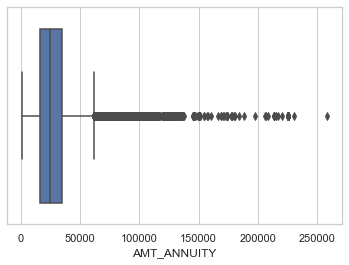

In [57]:
#Check for the distribution of AMT_ANNUITY
# It implies loans that are paid back over a set period of time at a set interest rate with consistent payments each period
sns.set_theme(style='whitegrid')
sns.boxplot(app_data.AMT_ANNUITY)
plt.show()

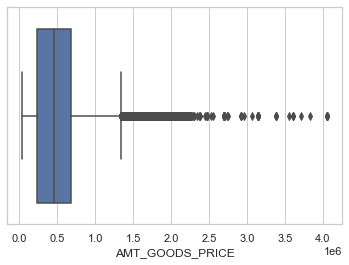

In [58]:
# To check the distribution of AMT_GOODS_PRICE - For consumer loans it is the price of the goods above ~Rs 3 Lakhs are distinct outliers 
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()

#### Standardizing Days to Years in various columns as that the data is captured in days

In [59]:
# Also, abs value taken so that the Year does not remain in negative value
app_data['YEARS_EMPLOYED'] = app_data.apply(lambda x: abs(round(x['DAYS_EMPLOYED']/ 365,2)), axis=1)

In [60]:
app_data['YEARS_BIRTH'] = app_data.apply(lambda x: abs(round(x['DAYS_BIRTH']/ 365,2)), axis=1)

In [61]:
app_data['YEARS_REGISTRATION'] = app_data.apply(lambda x: abs(round(x['DAYS_REGISTRATION']/ 365,2)), axis=1)

In [62]:
app_data['YEARS_ID_PUBLISH'] = app_data.apply(lambda x: abs(round(x['DAYS_ID_PUBLISH']/ 365,2)), axis=1)

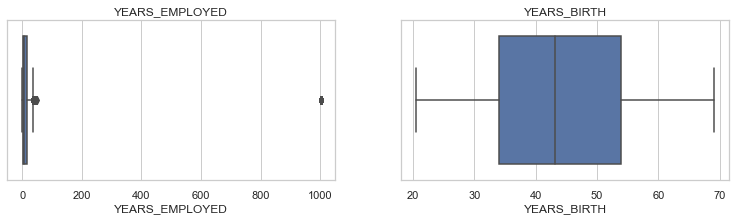

<Figure size 432x288 with 0 Axes>

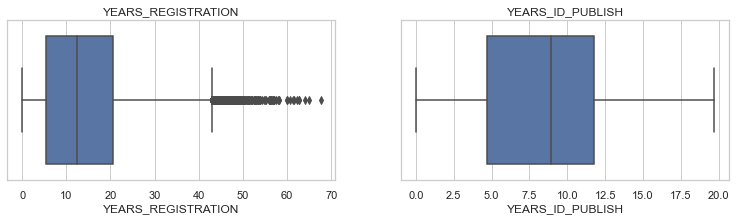

In [63]:
# To Check if we have Outliers present in the attributes such as 

plt.figure(figsize=(20,10))

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("YEARS_EMPLOYED")
sns.boxplot(app_data.YEARS_EMPLOYED)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("YEARS_BIRTH")
sns.boxplot(app_data.YEARS_BIRTH)


plt.figure(2)
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(3, 3, 1)
plt.title("YEARS_REGISTRATION")
sns.boxplot(app_data.YEARS_REGISTRATION)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("YEARS_ID_PUBLISH")
sns.boxplot(app_data.YEARS_ID_PUBLISH)

plt.show()

In [64]:
# In ideal scenario, Age should always be greater than other 3 attributes but it is not so.

days_to_years = app_data[(app_data['YEARS_BIRTH'] < app_data['YEARS_REGISTRATION']) | (app_data['YEARS_BIRTH'] < app_data['YEARS_ID_PUBLISH'])
                | (app_data['YEARS_BIRTH'] < app_data['YEARS_EMPLOYED'])]

In [65]:
days_to_years.shape

(55374, 43)

In [66]:
#Checking the unique values of YEARS_EMPLOYED
days_to_years.YEARS_EMPLOYED.value_counts()

1000.67    55374
Name: YEARS_EMPLOYED, dtype: int64

In [67]:
# In order to find for Pensioner and Unemployed people employment duration is defaulted to 1000.67

days_to_years.NAME_INCOME_TYPE.value_counts()

Pensioner               55352
Unemployed                 22
Working                     0
Student                     0
State servant               0
Maternity leave             0
Commercial associate        0
Businessman                 0
Name: NAME_INCOME_TYPE, dtype: int64

In [68]:
# Make a copy of all other records which are having valid values in YEARS_EMPLOYED
YEARS_EMPLOYED_Subset = app_data[~(app_data[['YEARS_EMPLOYED']]>800)].copy()

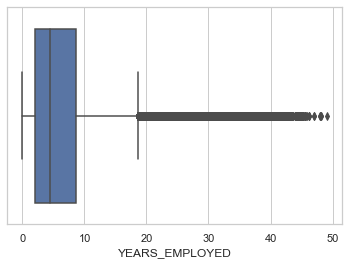

In [69]:
# Check for distribution of YEARS_EMPLOYED_Subset. Looks like its better than the complete dataset.
sns.boxplot(YEARS_EMPLOYED_Subset.YEARS_EMPLOYED)
plt.show()

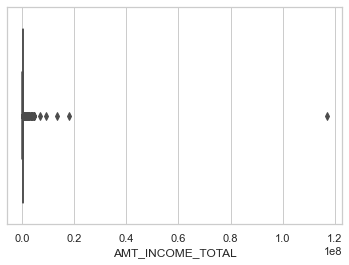

In [70]:
#Checking Outliers in AMT_INCOME_TOTAL
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

In [71]:
# Checking highest income
app_data.AMT_INCOME_TOTAL.sort_values(ascending=False).head(25)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
20216       3825000.0
49645       3600000.0
284311      3600000.0
82846       3375000.0
86026       3375000.0
248159      3150000.0
101007      3150000.0
107926      2930026.5
258773      2700000.0
298082      2475000.0
145673      2250000.0
201855      2250000.0
206814      2250000.0
278212      2250000.0
10222       2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [72]:
#Now capping in the form of range of income which is greater than 4000000 to 5000000

app_data['AMT_INCOME_TOTAL'][app_data.AMT_INCOME_TOTAL>4000000.0] = 5000000.0

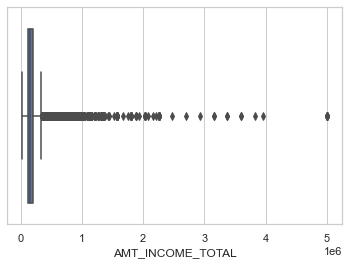

In [73]:
#Checking for the distribution again
sns.boxplot(app_data.AMT_INCOME_TOTAL)
plt.show()

### Binning the attributes

In [74]:
# Checking for the mimimum and maximum values available in YEARS_BIRTH
print(app_data.YEARS_BIRTH.min(),app_data.YEARS_BIRTH.max())

20.52 69.12


In [75]:
# Binning the data according to the Decade
app_data['age_by_decade'] = pd.cut(x=app_data['YEARS_BIRTH'], bins=[20, 29, 39, 49, 59, 70], labels=['20s', '30s', '40s','50s','60s'])

In [76]:
#We verified the data
app_data.age_by_decade.value_counts()

30s    81212
40s    78660
50s    68065
60s    42196
20s    37378
Name: age_by_decade, dtype: int64

In [77]:
# Checking for the mimimum and maximum values available in YEARS_EMPLOYED
print(app_data.YEARS_EMPLOYED.min(),app_data.YEARS_EMPLOYED.max())

0.0 1000.67


In [78]:
# Removing parent columns
app_data.drop(['YEARS_BIRTH','YEARS_EMPLOYED'],axis=1,inplace=True)

####  Divide the data into two sets, i.e. Target=1 and Target=0

In [79]:
fraud_cases=app_data[app_data['TARGET']==1]
non_fraud_cases=app_data[app_data['TARGET']==0]

In [80]:
# Checking for the Categorical and Numerical data in app_data
app_data.nunique().sort_values()

TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
LIVE_CITY_NOT_WORK_CITY             2
LIVE_REGION_NOT_WORK_REGION         2
CODE_GENDER                         3
age_by_decade                       5
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    19
HOUR_APPR_PROCESS_START            24
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
OBS_60_CNT_SOCIAL_CIRCLE           33
OBS_30_CNT_SOCIAL_CIRCLE           33
ORGANIZATION

## Multivariate Analysis.

#### Analyzing the Categorical Data

So attributes considered to analyze categorical data are as follows :

In [81]:
# Mean depicts the average value of grouped attribute. However, in some cases, our study may not satisfy the objetive as we need cumulative data
# Summation is good for balanced dataset but we would use it here understanding pros and cons of it. We need to keep in mind 
# that Banks are more intertesd in total amount defaulted by particular category

<AxesSubplot:title={'center':'Complete-data'}, ylabel='TARGET'>

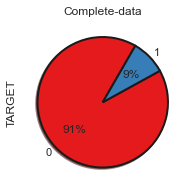

In [82]:
# Let's see the proportions of Non-defaulters vs Defaulters. 
plt.figure(figsize=(4,3))
plt.title("Complete-data")
total_bank_data.TARGET.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


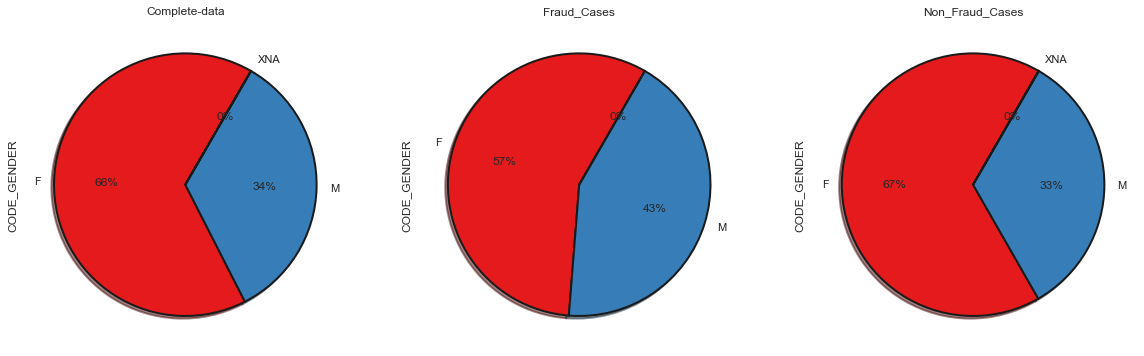

In [83]:
# Let's now see how CODE_GENDER plays role in Loans Defaulting
# You will find Men are more prone for Bad Loans with the given percentage comparison.

plt.figure(figsize=(20,15))

plt.subplot(1, 3, 1)
plt.title("Complete-data")
app_data.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud_cases.CODE_GENDER.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set1"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.show()

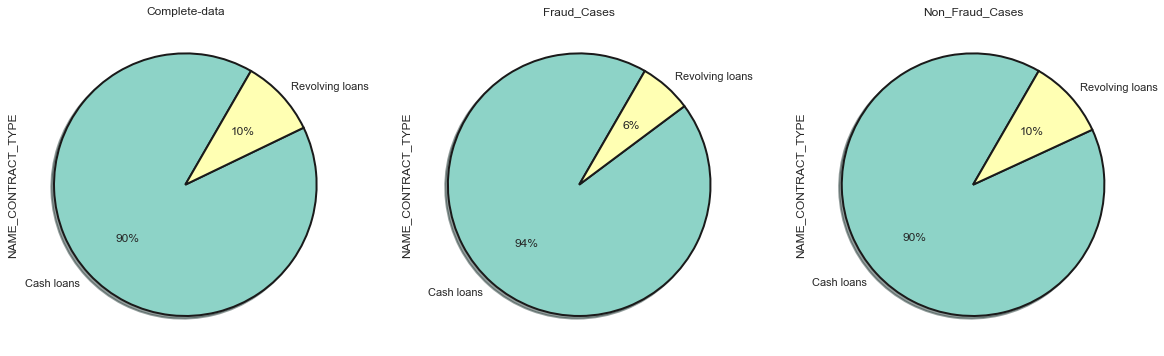

In [84]:
# Now we looked at how NAME_CONTRACT_TYPE plays role in Loans Defaulting
# Our assumption is that we will find there are high chances of Cash Loans are getting defaulted

plt.figure(figsize=(20,15))

plt.subplot(1, 3, 1)
plt.title("Complete-data")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)


plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud_cases.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
plt.show()

### Multivariate analysis on Categorical and Numerical data

In [85]:
# Deploying Bivariate analysis on Categorical Data
# So, hereunder we have replaced CAR_OWN Indicator to Numeric indicator to make it simpler to analyse

non_fraud_cases['CAR_OWN'] = np.where(non_fraud_cases.FLAG_OWN_CAR == 'Y', 1,0)
fraud_cases['CAR_OWN'] = np.where(fraud_cases.FLAG_OWN_CAR == 'Y', 1,0)
app_data['CAR_OWN'] = np.where(app_data.FLAG_OWN_CAR == 'Y', 1,0)

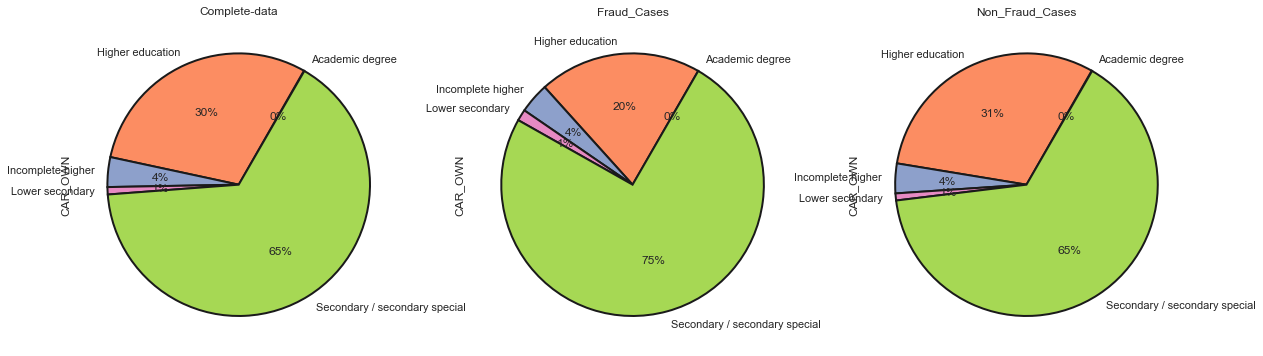

In [86]:
# Checking if there are any relationship between Ownership of cars and whether their education plays role in Fraud Loans
# Interesting note that Higher Education people do lesser frauds.

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.title("Complete-data")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(1, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(1, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud_cases.groupby("NAME_EDUCATION_TYPE")['CAR_OWN'].sum().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set2"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.show()

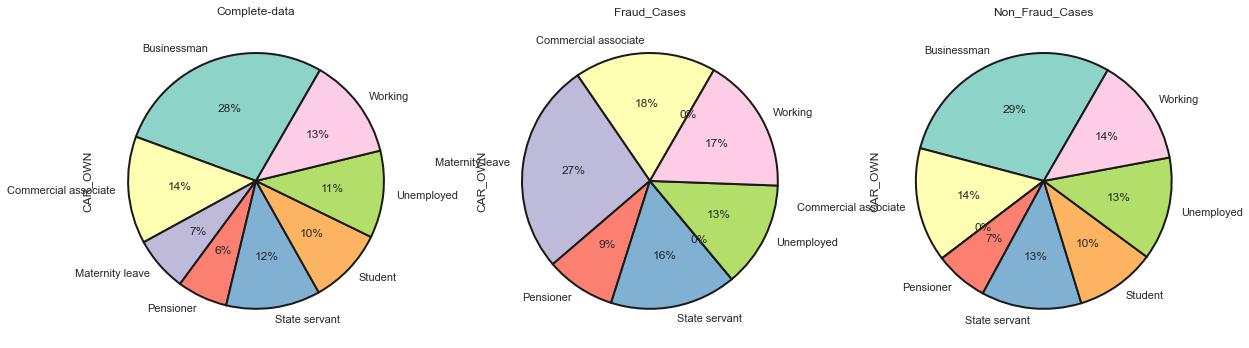

In [87]:
# Checking if there are any relationship between Ownership of cars and whether their income plays role in Fraud Loans
# We have found that Car owners on Maternity Leave plays a great factor here.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-data")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud_cases.groupby("NAME_INCOME_TYPE")['CAR_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})
plt.show()

In [88]:
# Analyzing on FLAG_OWN_REALTY which would tell how having some property impacts on Loan Default

non_fraud_cases['REALTY_OWN'] = np.where(non_fraud_cases.FLAG_OWN_REALTY == 'Y', 1,0)
fraud_cases['REALTY_OWN'] = np.where(fraud_cases.FLAG_OWN_REALTY == 'Y', 1,0)
app_data['REALTY_OWN'] = np.where(app_data.FLAG_OWN_REALTY == 'Y', 1,0)

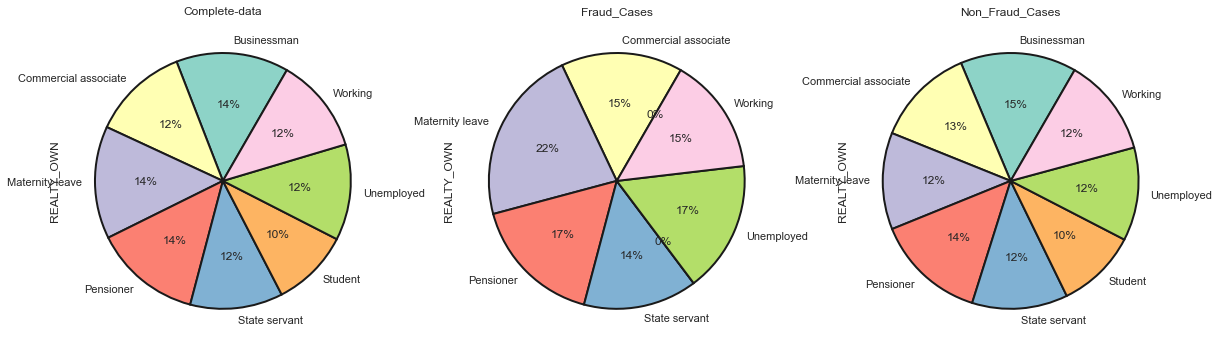

In [89]:
# Analysis how Owner of the reality and their Income type plays role in Fraud Loans
# You will find Working client on Maternity leaves having higher percentage.

plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-data")
#a=sns.boxplot(data=app_data, x='NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL').mean()
app_data.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
fraud_cases.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
non_fraud_cases.groupby("NAME_INCOME_TYPE")['REALTY_OWN'].mean().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("Set3"),startangle = 60,wedgeprops={"linewidth":2,"edgecolor":"k"})
plt.show()

### Analyzing of Numerical data

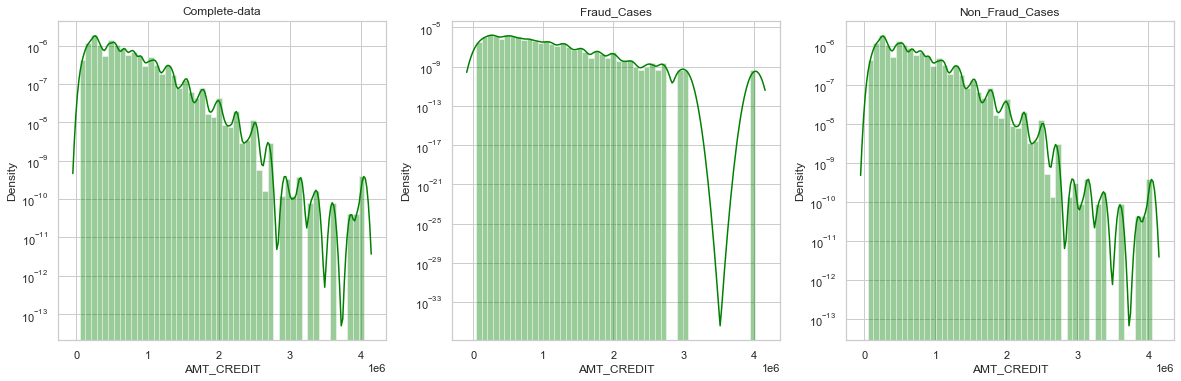

In [90]:
# Below 3 distribution plots are created so that we can compare the AMT_CREDIT in all the 
# 3 cases - Fraud, Non-Fraud and Complete data


plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-data")
a=sns.distplot(app_data.AMT_CREDIT,color='green')
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_CREDIT,color='green')
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud_cases.AMT_CREDIT,color='green')
c.set_yscale('log')

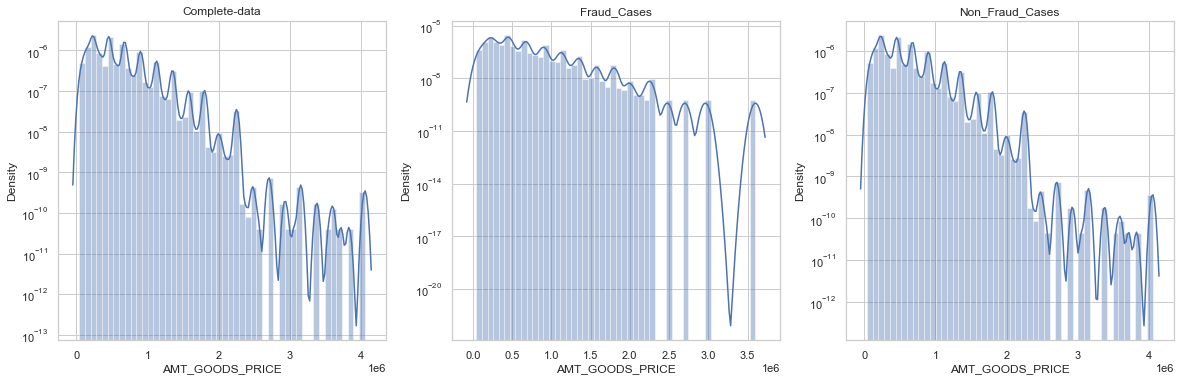

In [91]:
# Below 3 distribution plots are created so that we can compare the AMT_GOODS_PRICE in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.


plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-data")
a=sns.distplot(app_data.AMT_GOODS_PRICE)
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_GOODS_PRICE)
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud_cases.AMT_GOODS_PRICE)
c.set_yscale('log')

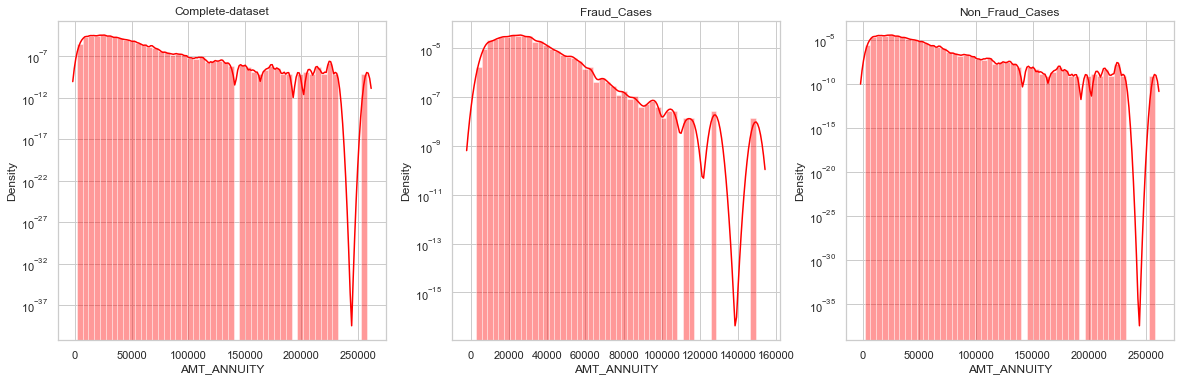

In [92]:
# Below 3 distribution plots are created so that we can compare the AMT_ANNUITY in all the 
# 3 cases - Fraud, Non-Fraud and Complete dataset.


plt.figure(figsize=(20,20))
plt.subplot(3, 3, 1)
plt.title("Complete-dataset")
a=sns.distplot(app_data.AMT_ANNUITY,color='red')
a.set_yscale('log')

plt.subplot(3, 3, 2)
plt.title("Fraud_Cases")
b=sns.distplot(fraud_cases.AMT_ANNUITY,color='red')
b.set_yscale('log')

plt.subplot(3, 3, 3)
plt.title("Non_Fraud_Cases")
c=sns.distplot(non_fraud_cases.AMT_ANNUITY.dropna(),color='red')
c.set_yscale('log')


### Checking Corelation among Numerical Attributes

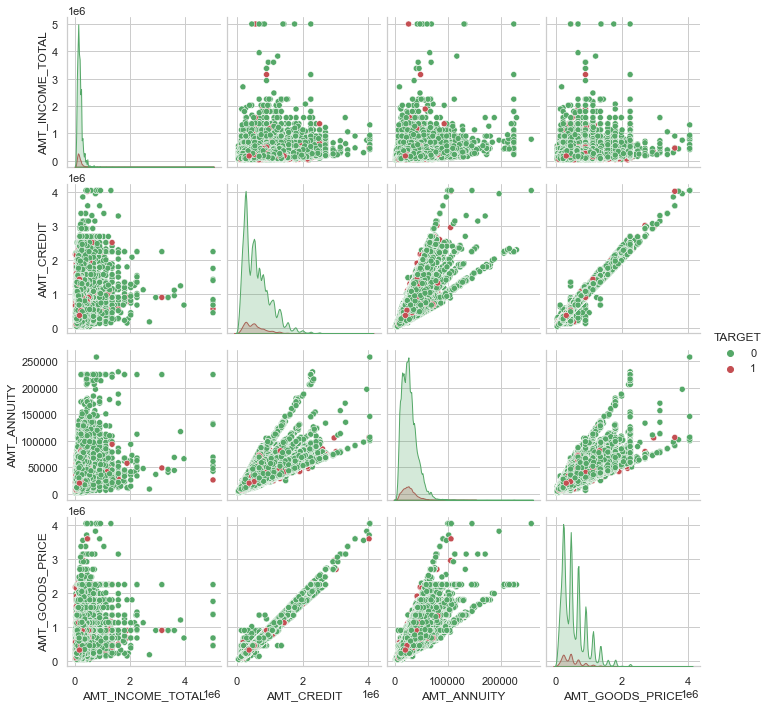

In [93]:
# Below we have created a pairplot to see all the amounts are corelated or not.

amt_corel = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]
sns.pairplot(amt_corel,hue='TARGET',palette=["g","r"])
plt.show()

In [94]:
# corr would hold all the attributes with non-object datatypes for complete dataset
corr= app_data.loc[:, app_data.dtypes!=np.object].corr()

In [95]:
# corr_fraud would hold all the attributes with non-object datatypes for fraud_cases dataset
corr_fraud= fraud_cases.loc[:, app_data.dtypes!=np.object].corr().corr()

In [96]:
# corr_non_fraud would hold all the attributes with non-object datatypes for non_fraud dataset
corr_non_fraud= non_fraud_cases.loc[:, app_data.dtypes!=np.object].corr().corr()

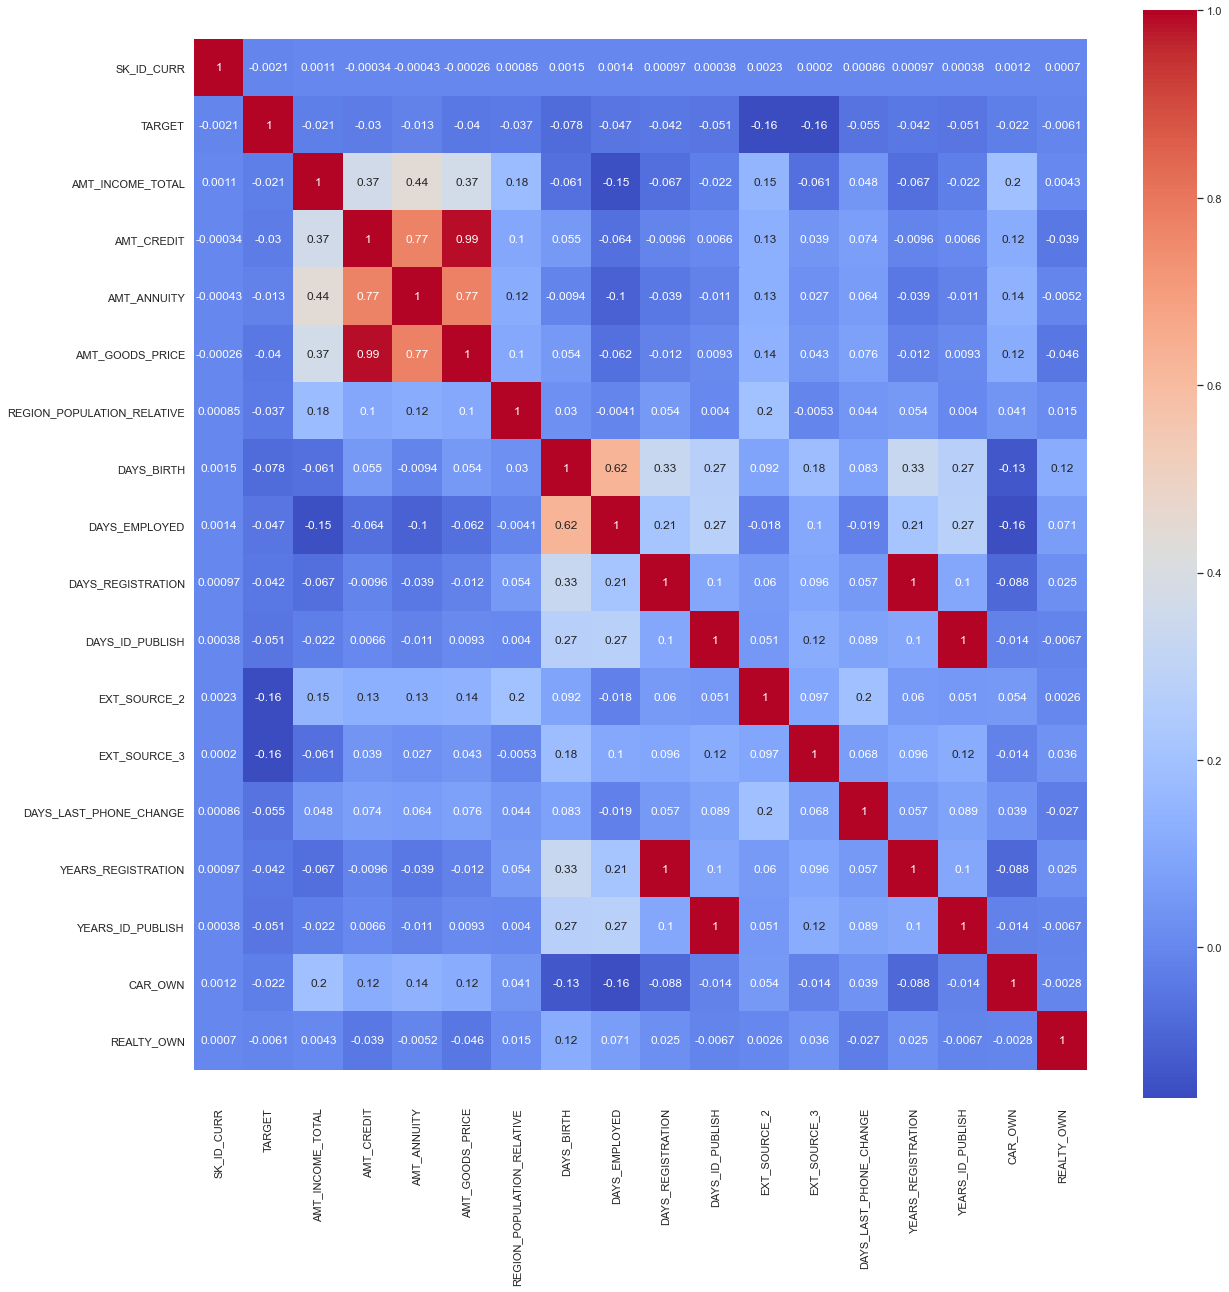

In [97]:
# Heatmap for all the Numerical attributes
plt.figure(figsize=(20,20))
ax=sns.heatmap(corr,annot=True,cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Top 10 Corelation

#### Inferences will be shown in the presentation

In [98]:
# Finding the top 10 corelation for Numerical attributes on Complete Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_top10_Positive

,VAR1,VAR2,CORELATION
261,YEARS_REGISTRATION,DAYS_REGISTRATION,1.000000
280,YEARS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000
93,AMT_GOODS_PRICE,AMT_CREDIT,0.986734
94,AMT_GOODS_PRICE,AMT_ANNUITY,0.774837
75,AMT_ANNUITY,AMT_CREDIT,0.770127
151,DAYS_EMPLOYED,DAYS_BIRTH,0.623941
74,AMT_ANNUITY,AMT_INCOME_TOTAL,0.444712
92,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.373332
56,AMT_CREDIT,AMT_INCOME_TOTAL,0.366534
169,DAYS_REGISTRATION,DAYS_BIRTH,0.331912


In [99]:
# Top 10 Negative corelation
corr_top10_Negative

,VAR1,VAR2,CORELATION
199,EXT_SOURCE_2,TARGET,-0.160303
217,EXT_SOURCE_3,TARGET,-0.157397
296,CAR_OWN,DAYS_EMPLOYED,-0.155085
146,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.147253
295,CAR_OWN,DAYS_BIRTH,-0.129879
148,DAYS_EMPLOYED,AMT_ANNUITY,-0.102848
302,CAR_OWN,YEARS_REGISTRATION,-0.087766
297,CAR_OWN,DAYS_REGISTRATION,-0.087766
127,DAYS_BIRTH,TARGET,-0.078239
254,YEARS_REGISTRATION,AMT_INCOME_TOTAL,-0.066691


In [100]:
# Finding the top 10 corelation for Numerical attributes on non-fraud Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr_non_fraud.where(np.triu(np.ones(corr_non_fraud.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_non_fraud_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_non_fraud_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_non_fraud_top10_Positive

,VAR1,VAR2,CORELATION
261,YEARS_REGISTRATION,DAYS_REGISTRATION,1.000000
280,YEARS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000
93,AMT_GOODS_PRICE,AMT_CREDIT,0.999873
94,AMT_GOODS_PRICE,AMT_ANNUITY,0.961210
75,AMT_ANNUITY,AMT_CREDIT,0.959962
151,DAYS_EMPLOYED,DAYS_BIRTH,0.883686
74,AMT_ANNUITY,AMT_INCOME_TOTAL,0.726735
92,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.650598
56,AMT_CREDIT,AMT_INCOME_TOTAL,0.646478
169,DAYS_REGISTRATION,DAYS_BIRTH,0.479549


In [101]:
# Top 10 Negative corelation 
corr_non_fraud_top10_Negative

,VAR1,VAR2,CORELATION
146,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.600587
295,CAR_OWN,DAYS_BIRTH,-0.573166
128,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.556147
296,CAR_OWN,DAYS_EMPLOYED,-0.537224
148,DAYS_EMPLOYED,AMT_ANNUITY,-0.524294
149,DAYS_EMPLOYED,AMT_GOODS_PRICE,-0.461407
147,DAYS_EMPLOYED,AMT_CREDIT,-0.459080
130,DAYS_BIRTH,AMT_ANNUITY,-0.453309
254,YEARS_REGISTRATION,AMT_INCOME_TOTAL,-0.450352
164,DAYS_REGISTRATION,AMT_INCOME_TOTAL,-0.450352


In [102]:
# Finding the top 10 corelation for Numerical attributes on fraud Dataset
# Please note that there are negative corelation as well and we will compute those seperately. 

corrdf=corr_fraud.where(np.triu(np.ones(corr_fraud.shape),k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns =  ['VAR1','VAR2','CORELATION']
corrdf.dropna(subset=['CORELATION'],inplace=True)
corr_fraud_top10_Positive=corrdf.sort_values('CORELATION',ascending=False).head(10)
corr_fraud_top10_Negative=corrdf.sort_values('CORELATION',ascending=True).head(10)
corr_fraud_top10_Positive

,VAR1,VAR2,CORELATION
261,YEARS_REGISTRATION,DAYS_REGISTRATION,1.000000
280,YEARS_ID_PUBLISH,DAYS_ID_PUBLISH,1.000000
93,AMT_GOODS_PRICE,AMT_CREDIT,0.999758
75,AMT_ANNUITY,AMT_CREDIT,0.945697
94,AMT_GOODS_PRICE,AMT_ANNUITY,0.945588
151,DAYS_EMPLOYED,DAYS_BIRTH,0.836615
74,AMT_ANNUITY,AMT_INCOME_TOTAL,0.613005
92,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.515839
56,AMT_CREDIT,AMT_INCOME_TOTAL,0.515160
169,DAYS_REGISTRATION,DAYS_BIRTH,0.372984


In [103]:
# Top 10 Negative corelation on Fraud dataset
corr_fraud_top10_Negative

,VAR1,VAR2,CORELATION
146,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.482326
295,CAR_OWN,DAYS_BIRTH,-0.453600
296,CAR_OWN,DAYS_EMPLOYED,-0.441067
148,DAYS_EMPLOYED,AMT_ANNUITY,-0.433129
128,DAYS_BIRTH,AMT_INCOME_TOTAL,-0.395266
302,CAR_OWN,YEARS_REGISTRATION,-0.363140
297,CAR_OWN,DAYS_REGISTRATION,-0.363140
254,YEARS_REGISTRATION,AMT_INCOME_TOTAL,-0.363108
164,DAYS_REGISTRATION,AMT_INCOME_TOTAL,-0.363107
256,YEARS_REGISTRATION,AMT_ANNUITY,-0.361758


### Analysis and inferences on previous_application dataset

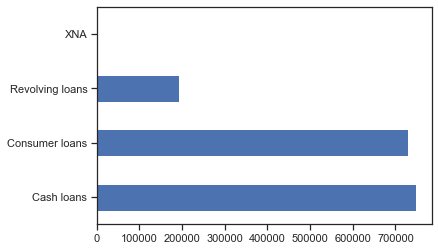

In [104]:
# Lets see what we have in NAME_CONTRACT_TYPE
sns.set_theme(style='ticks')
prev_data.NAME_CONTRACT_TYPE.value_counts().plot(kind='barh')
plt.show()

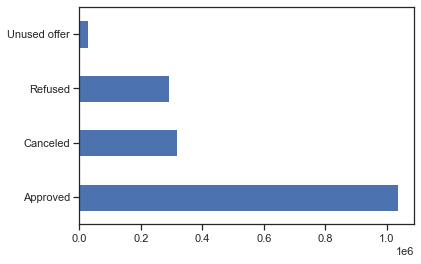

In [105]:
# Lets see what we have in NAME_CONTRACT_STATUS
prev_data.NAME_CONTRACT_STATUS.value_counts().plot(kind='barh')
plt.show()

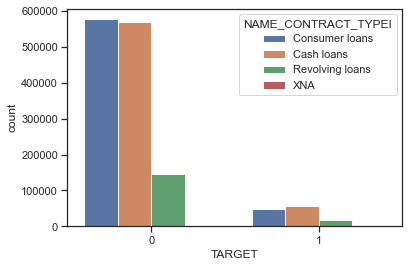

In [106]:
# Let's see how NAME_CONTRACT_TYPEI (in merged dataset) is related with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPEI', data=total_bank_data )
plt.show()

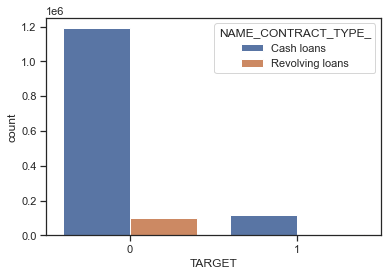

In [107]:
# Let's see how NAME_CONTRACT_TYPE_x (in app dataset) is realted with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_TYPE_', data=total_bank_data)
plt.show()

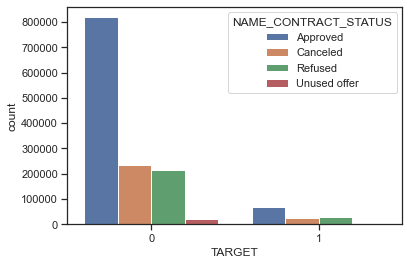

In [108]:
# Let's see how NAME_CONTRACT_STATUS is realted with Target
sns.countplot(x='TARGET', hue='NAME_CONTRACT_STATUS', data=total_bank_data)
plt.show()

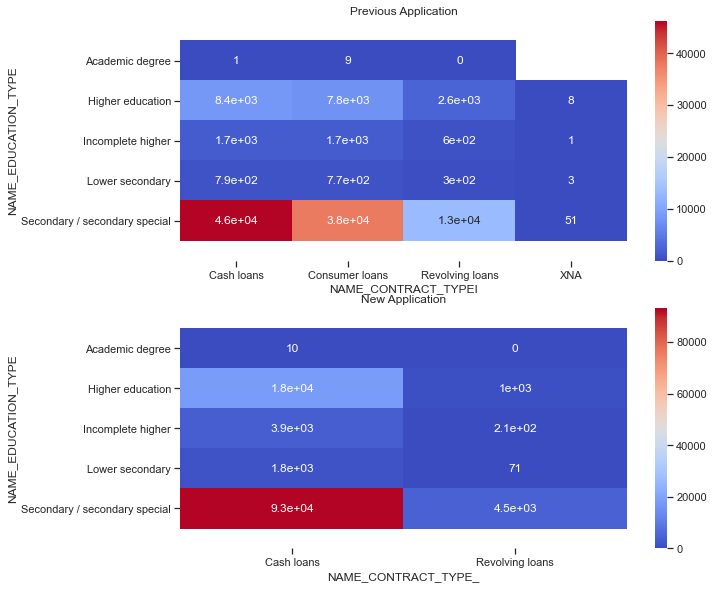

In [109]:
# Lets see the heatmap of NAME_EDUCATION_TYPE and NAME_CONTRACT_TYPE_y with Target as Values 
# AND NAME_EDUCATION_TYPE and NAME_CONTRACT_TYPE_x with TARGET as values.

plt.figure(figsize=(10,15))
plt.subplot(3, 1, 1)
plt.title('Previous Application')
df2_heatmap = total_bank_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_TYPEI',aggfunc=np.sum)
ax=sns.heatmap(df2_heatmap,annot=True,cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.subplot(3, 1, 2)
plt.title('New Application')
df2_heatmap = total_bank_data.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='NAME_CONTRACT_TYPE_',aggfunc=np.sum)
ax=sns.heatmap(df2_heatmap,annot=True,cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

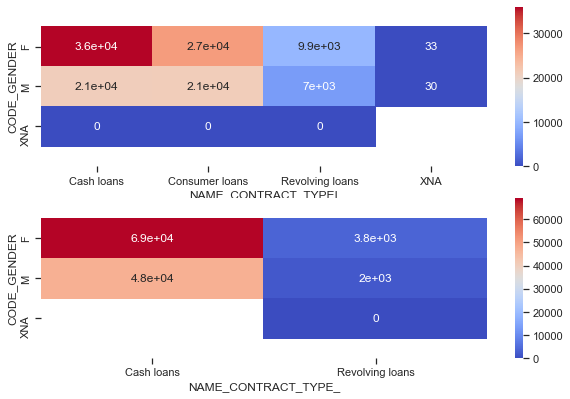

In [110]:
# Lets see the heatmap of CODE_GENDER and NAME_CONTRACT_TYPE_y with Target as Values 
# AND CODE_GENDER and NAME_CONTRACT_TYPE_x with TARGET as values.

plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
df_heatmap = total_bank_data.pivot_table(values='TARGET',index='CODE_GENDER',columns='NAME_CONTRACT_TYPEI',aggfunc=np.sum)
ax=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(3, 1, 2)
df_heatmap = total_bank_data.pivot_table(values='TARGET',index='CODE_GENDER',columns='NAME_CONTRACT_TYPE_',aggfunc=np.sum)
ax=sns.heatmap(df_heatmap,annot=True,cmap="coolwarm")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

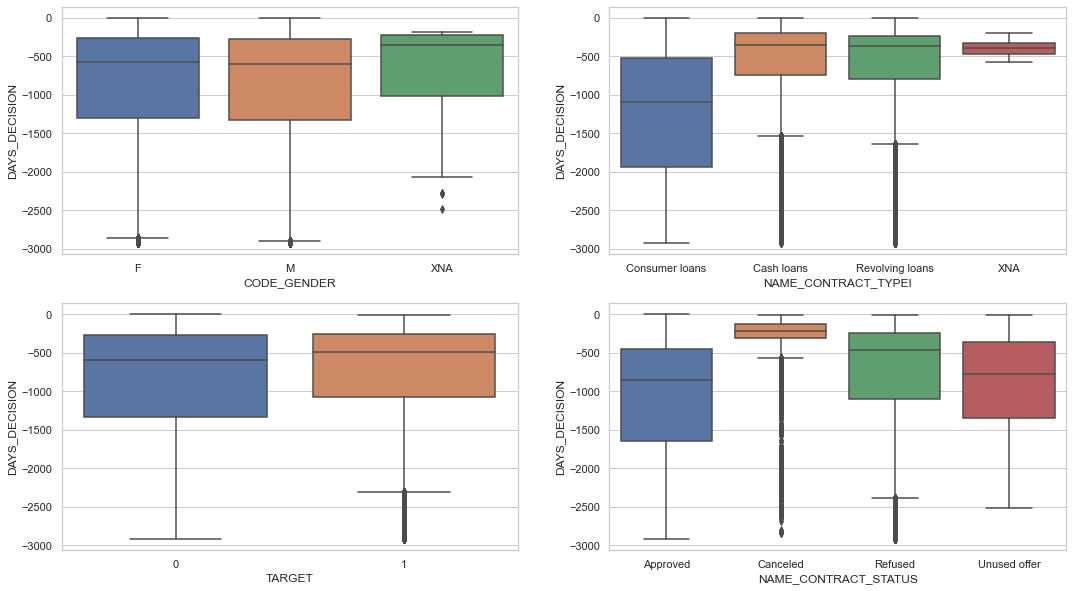

In [111]:
# Lets now see how DAYS_DECISION defers for various categorical attributes.

sns.set_theme(style='whitegrid')
plt.figure(figsize=(18,10))
cat_var = ['CODE_GENDER', 'NAME_CONTRACT_TYPEI', 'TARGET', 'NAME_CONTRACT_STATUS']
for i in enumerate(cat_var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x=i[1], y="DAYS_DECISION", data=total_bank_data)

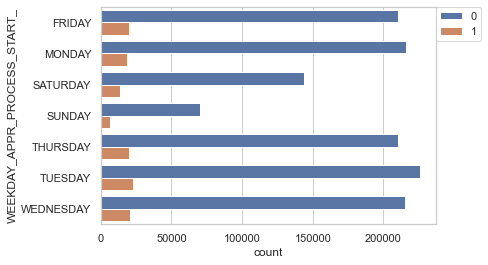

In [112]:
# Does days of Application Process start impact on Defaulting?

sns.countplot(y='WEEKDAY_APPR_PROCESS_START_', hue='TARGET', data=total_bank_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) #avoiding legends overlap with plot.
plt.show()

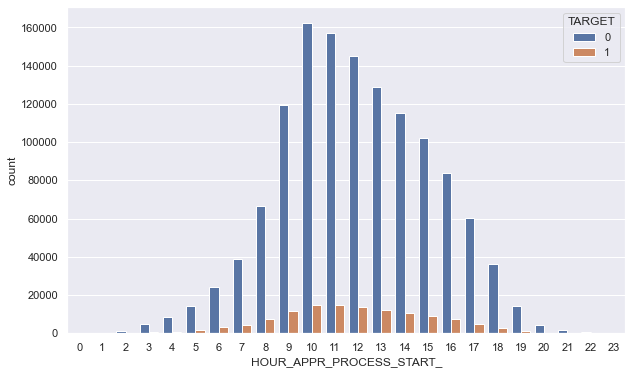

In [113]:
# Does days of Application Process start hour impact on Defaulting?

sns.set(rc={'figure.figsize':(10,6)}) #changing plot size for better visibility.
sns.countplot(x='HOUR_APPR_PROCESS_START_', hue='TARGET', data=total_bank_data)
plt.show()

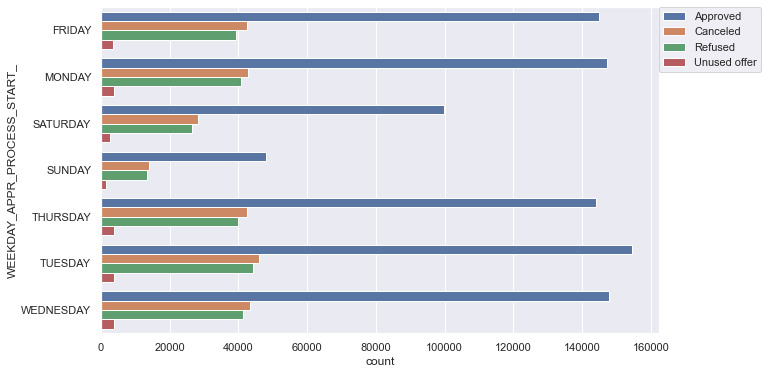

In [114]:
# Does days of Application Process start day impact on Staus of the Loans?

sns.countplot(y='WEEKDAY_APPR_PROCESS_START_', hue='NAME_CONTRACT_STATUS', data=total_bank_data)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.) #avoid legends overlap with plot.
plt.show()

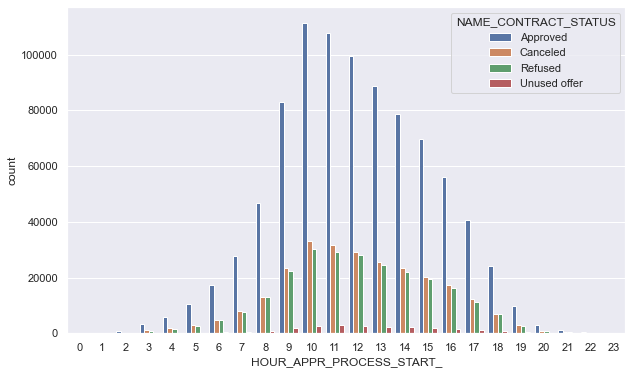

In [115]:
# Does days of Application Process start hour impact on Staus of the Loans?

sns.countplot(x='HOUR_APPR_PROCESS_START_', hue='NAME_CONTRACT_STATUS', data=total_bank_data)
plt.show()

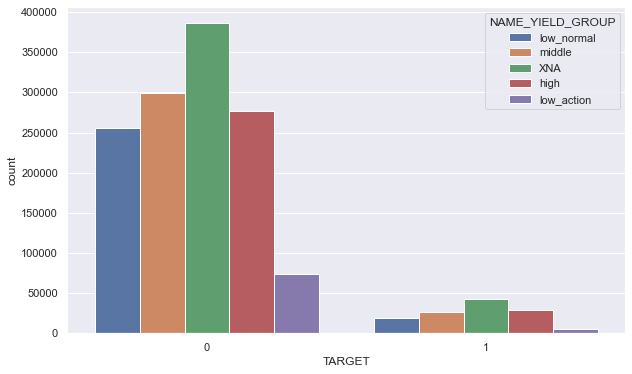

In [116]:
# Does Grouped interest rate impact on Status of defaulting the Loans?

sns.countplot(x='TARGET', hue='NAME_YIELD_GROUP', data=total_bank_data) 
plt.show()

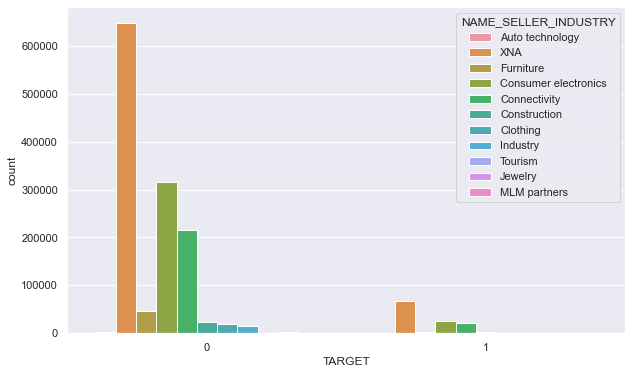

In [117]:
# Does Seller Industry impact on Status of defaulting the Loans?

sns.countplot(x='TARGET', hue='NAME_SELLER_INDUSTRY', data=total_bank_data) 
plt.show()

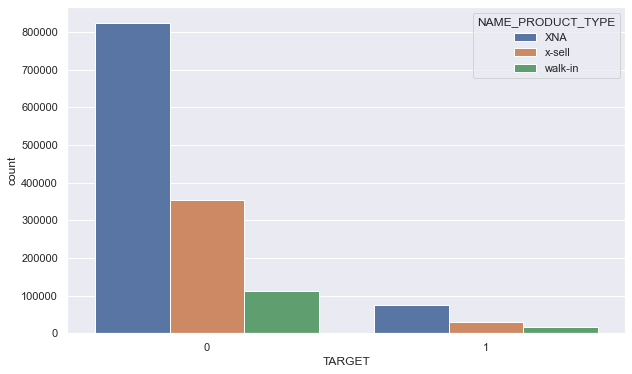

In [118]:
# Does Product Type on Status of defaulting the Loans?

sns.countplot(x='TARGET', hue='NAME_PRODUCT_TYPE', data=total_bank_data) 
plt.show()

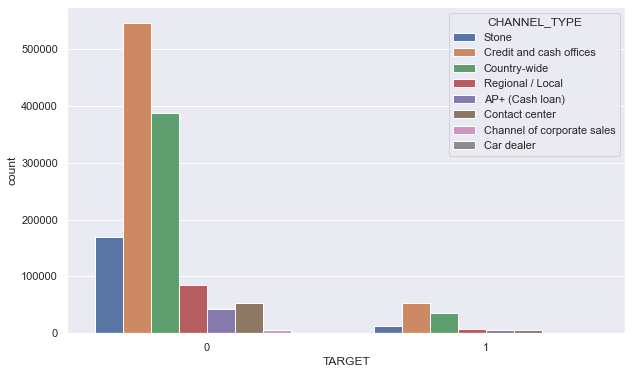

In [119]:
# Does Loan Channel of defaulting the Loans?

sns.countplot(x='TARGET', hue='CHANNEL_TYPE', data=total_bank_data) 
plt.show()